
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, February 6 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

### <p style="text-align: left;">Name: Xiaocheng Shen (xs2948)</p>
### <p style="text-align: left;">Name: Dawei Liang (dl33629)</p>


# Question 1: TED Talk (5 pts)
Watch the video at https://www.ted.com/talks/anthony_goldbloom_the_jobs_we_ll_lose_to_machines_and_the_ones_we_won_t
1. List two of the tasks mentioned in the video that machine learning is being used to automate.
2. What kind of machine learning procedures were used for each of these tasks (classification, regression, clustering etc.)?


## Answer

 1. Grade High School Essays; Diagnose eye diseases.<br>
 2. The two tasks both use classification.

# Question 2: Maximum Likelihood Estimation (5pts)
Consider the following continuous univariate probability distribution involving a single parameter $\lambda$.

$$P(x_i; \lambda) = \lambda e^{-\lambda x_i}, ~~~ x_i \geq 0 $$, and zero elsewhere.

Given N data points $x_1, x_2, \ldots x_N$ drawn i.i.d. from this distribution, derive the MLE estimate for $\lambda$, in terms of $x_1, x_2, \ldots x_N$.

## Answer
#### The log likelihood function:

\begin{eqnarray*}
l(\lambda) &=& \sum_{i=1}^N (ln(\lambda) - \lambda x_i)\\
\end{eqnarray*}

#### The first order condition for a maximum is:

$$\frac{\delta} {\delta \lambda} l(\lambda) = N \frac{1} {\lambda} - \sum_{i=1}^N x_i = 0$$

#### By sovling the equation above, we can get the MLE estimate for $\lambda$:

$$\lambda = \frac {N} {\sum_{i=1}^N x_i}$$


# Question 3: Bivariate Normal Distribution (15pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 9; \rho = 0.5$

a. (4 pts) Obtain contour plots for each of the two distributions using  Python.  (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (3 pts) View 3-D plots for the two distributions (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

d. (3 pts) 

i) Consider a multivariate normal distribution of $X_1$, $X_2$,... $X_k$, $X$. What can be said of the probability distribution of the $Y = R*X + t$?


ii) From this, how can one compute the marginal probability of $(X_1,... X_m)$ for some $m < k$? What can be said of the probability distribution of this subset?
## Answer


## Question a:

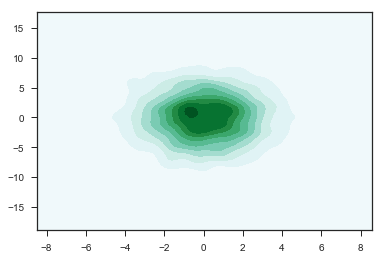

In [1]:
#3a-1
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

mean, cov = [0, 0], [(4, 0), (0, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=5000).T
ax = sns.kdeplot(x, y, shade=True)

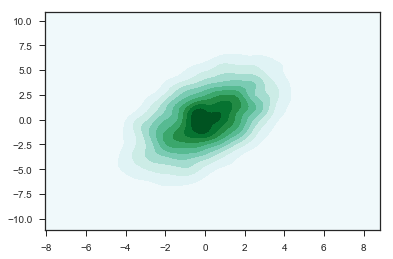

In [2]:
##3a-2
mean2, cov2 = [0, 0], [(4, 3), (3, 9)]
x2,y2 = np.random.multivariate_normal(mean2, cov2, size=5000).T
ax1 = sns.kdeplot(x2, y2, shade=True)

## Question b:

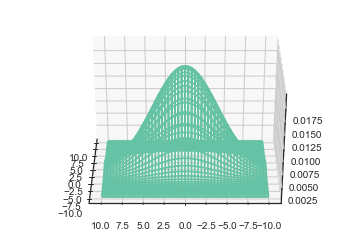

In [53]:
#3b-1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 4


mu_y = 0
variance_y = 16

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, rv.pdf(pos))
ax.view_init(30, 180)
plt.draw()


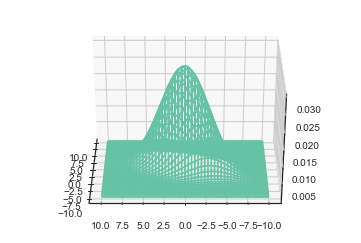

In [54]:
#3b-2
rv2 = multivariate_normal([mu_x, mu_y], [[4, 3], [3, 9]])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, rv2.pdf(pos))
ax.view_init(30, 180)
plt.draw()


## Question c:

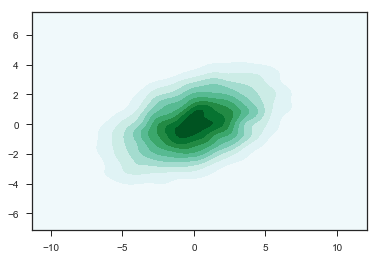

In [3]:
#3c
U = x2 * np.cos(-np.pi/4.0) - y2 * np.sin(-np.pi/4.0)
V = x2 * np.sin(-np.pi/4.0) + y2 * np.cos(-np.pi/4.0)
ax = sns.kdeplot(U, V, shade=True)

## Question d:
    

# Question 4: Multiple Linear Regression in Python (25 pts)

In this problem, you will perform linear regression using ordinary least squares on the dow_jones_index data, to predict 'next_weeks_open'. The dataset is attached in the homework. Some useful libraries have been attached in the starter code. 

a.  (5 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on 'percent_change_price' and 'percent_change_volume_over_last_wk' using the entire dataset (2 columns and all the rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html. 

b.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

c. (10 pts) Now repeat a. and b. using "open", "high", "low", "close", "percent_change_price", "percent_change_volume_over_last_wk" as features. What difference do you observe?

d.  (5 pts) Using the features in c, split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

## Answer

## Question a:

In [4]:
% matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


col1 = []
col2 = []
col3 = []

with open("dow_jones_index.data") as myfile:
    lines = myfile.readlines() #reads the entire file
    
for i in lines:
    x1, x2, y = i.split(',')[8], i.split(',')[9], i.split(',')[11]
    if "percent_change_price" not in x1:
        col1.append(i.split(',')[8])
    if "percent_change_volume_over_last_wk" not in x2:   
        col2.append(i.split(',')[9])
    if "next_weeks_open" not in y:   
        col3.append(i.split(',')[11])
    col = np.vstack((col1, col2))
myfile.close()

x1 = []
x2 = []
y = []

for i in range(0,len(col1)):
    if col2[i] != '':
        x1.append(float(str(col1[i])))
        x2.append(float(str(col2[i])))
        y.append(float(str(col3[i][1:])))
        
df = pd.DataFrame(x1)
df[1] = x2

clf = linear_model.LinearRegression()
clf.fit(df, y)


print 'Intercept: ', clf.intercept_
print 'Coef: ', clf.coef_

predictions = clf.predict(df)
mse = mean_squared_error(y, predictions)
print'MSE: ', mse
    




Intercept:  53.7127594897
Coef:  [ 1.49088015  0.00908261]
MSE:  1068.78643927


## Question b:

According to the distribution, the residulas are normal distributed. Thus, the MLR model is reasonable for this problem.

Text(0,0.5,u'f')

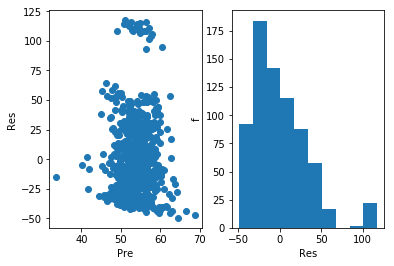

In [13]:
residuals = y - predictions
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(predictions, residuals)
ax1.set_xlabel("Pre")
ax1.set_ylabel("Res")
ax2.hist(residuals)
ax2.set_xlabel("Res")
ax2.set_ylabel("f")


## Question c:

Intercept:  -0.00948762454613
Coef:  [  2.29578497e-03   7.85085881e-04  -4.82873667e-03   1.39598743e-02
  -3.17473155e-02   1.02149607e+00]
MSE:  0.177656489227


Text(0,0.5,u'f')

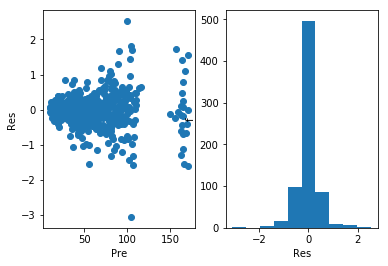

In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []

with open("dow_jones_index.data") as myfile:
    lines = myfile.readlines() #reads the entire file
    
for i in lines:
    x1, x2, x3, x4, x5, x6, y = i.split(',')[3], i.split(',')[4], i.split(',')[5], \
                        i.split(',')[6], i.split(',')[8], i.split(',')[9], i.split(',')[11]
                        
    if "percent_change_price" not in x5:
        col1.append(i.split(',')[8])
    if "percent_change_volume_over_last_wk" not in x6:   
        col2.append(i.split(',')[9])
    if "open" not in x1:   
        col3.append(i.split(',')[3])
    if "high" not in x2:   
        col4.append(i.split(',')[4])
    if "low" not in x3:   
        col5.append(i.split(',')[5])
    if "close" not in x4:   
        col6.append(i.split(',')[6])
    if "next_weeks_open" not in y:   
        col7.append(i.split(',')[11])
    
myfile.close()

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
y = []

for i in range(0,len(col1)):
    if col2[i] != '':
        x1.append(float(str(col1[i])))
        x2.append(float(str(col2[i])))
        x3.append(float(str(col3[i][1:])))
        x4.append(float(str(col4[i][1:])))
        x5.append(float(str(col5[i][1:])))
        x6.append(float(str(col6[i][1:])))
        y.append(float(str(col7[i][1:])))
        
df = pd.DataFrame(x1)
df[1] = x2
df[2] = x3
df[3] = x4
df[4] = x5
df[5] = x6

clf = linear_model.LinearRegression()
clf.fit(df, y)


print 'Intercept: ', clf.intercept_
print 'Coef: ', clf.coef_

predictions = clf.predict(df)
mse = mean_squared_error(y, predictions)
print'MSE: ', mse

residuals = y - predictions
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(predictions, residuals)
ax1.set_xlabel("Pre")
ax1.set_ylabel("Res")
ax2.hist(residuals)
ax2.set_xlabel("Res")
ax2.set_ylabel("f")




According to the distribution, the residulas are normal distributed. The diffrence we observed are:
1. MSE is siginificantly decreased compared with the previous version.
2. The distribution of residuals is more close to Gaussian Distribution, and the mean is much closer to 0 as well as the var becomes smaller.

## Question d:

In [16]:
X_train = df.iloc[:400,:]
y_train = y[:400]
X_test = df.iloc[400:,:]
y_test = y[400:]


clf1 = linear_model.LinearRegression()
clf1.fit(X_train, y_train)

predictions1 = clf1.predict(X_train)
mse1 = mean_squared_error(y_train, predictions1)
print'MSE1: ', mse1


predictions2 = clf1.predict(X_test)
mse2 = mean_squared_error(y_test, predictions2)
print 'MSE2: ', mse2


MSE1:  0.186293689752
MSE2:  0.190181160425


### MSE - training and MSE - test are close to each other, which means that our model obtained by traning set can be used on prediction properly.